In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dixit = pd.read_csv('../../results/dixit.csv', index_col=0).assign(Dataset='Dixit').drop(['split'], axis=1)
adamson = pd.read_csv('../../results/adamson.csv', index_col=0).assign(Dataset='Adamson').drop(['split'], axis=1)
norman = pd.read_csv('../../results/norman.csv', index_col=0).assign(Dataset='Norman').drop(['split'], axis=1)
norman = norman[norman.subgroup=='single'].drop(['subgroup'], axis=1)
k562 = pd.read_csv('../../results/k562.csv', index_col=0).assign(Dataset='Replogle K562').drop(['split'], axis=1)
rpe1 = pd.read_csv('../../results/rpe1.csv', index_col=0).assign(Dataset='Replogle RPE1').drop(['split'], axis=1)

all_df = pd.concat([dixit, adamson, norman, k562, rpe1])
all_df = all_df.melt(id_vars=['Dataset', 'Method'], value_vars=['NormMSE', 'Pearson', 'Spearman'], 
                                var_name='Metric', value_name='Value')
all_df['Method'] = all_df['Method'].replace('scOracle', 'Scouter')
all_df['Method'] = all_df['Method'].replace('Biolord', 'biolord')
all_df['Method'] = all_df['Method'].replace('Gears', 'GEARS')
all_df['Method'] = pd.Categorical(all_df['Method'], categories=['Scouter', 'biolord', 'GEARS'], ordered=True)

# Define a custom color palette
custom_palette = {
    'Scouter': 'mediumseagreen',
    'biolord': 'lightskyblue',  
    'GEARS': 'lightsalmon'
}

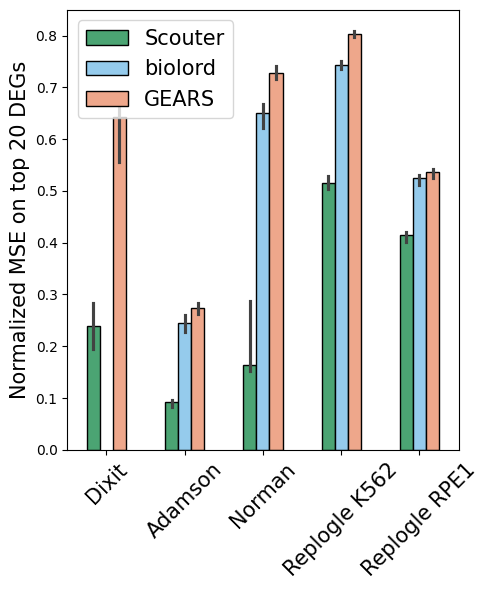

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
Dataset
Adamson          0.622560
Dixit                 NaN
Norman           0.747754
Replogle K562    0.305806
Replogle RPE1    0.212286
dtype: float64
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
Dataset
Adamson          0.662617
Dixit            0.627632
Norman           0.774725
Replogle K562    0.358399
Replogle RPE1    0.228675
dtype: float64


In [2]:
NMSE = all_df[all_df.Metric=='NormMSE']
plt.figure(figsize=(5,6), dpi=100)
barplot = sns.barplot(data=NMSE, x="Dataset", y="Value", hue="Method", width=0.5, 
                      palette=custom_palette, estimator='median', errorbar=("ci", 50))
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
legend = plt.legend(loc='upper left', fontsize=15)
legend.set_title('')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('')
plt.ylabel('Normalized MSE on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.show()

median_MSE = NMSE.groupby(['Dataset', 'Method'], observed=False)['Value'].median().reset_index()
pivot_MSE = median_MSE.pivot(index='Dataset', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
print((pivot_MSE['biolord'] - pivot_MSE['Scouter'])/pivot_MSE['biolord'])
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
print((pivot_MSE['GEARS'] - pivot_MSE['Scouter'])/pivot_MSE['GEARS'])

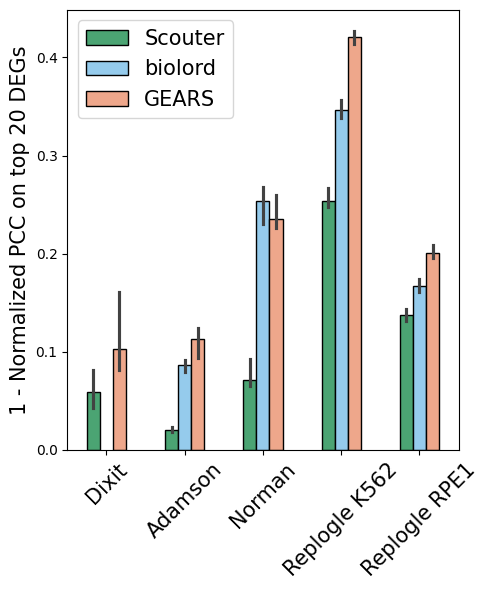

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
Dataset
Adamson          0.762788
Dixit                 NaN
Norman           0.717713
Replogle K562    0.266510
Replogle RPE1    0.181501
dtype: float64
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
Dataset
Adamson          0.817344
Dixit            0.422665
Norman           0.695586
Replogle K562    0.395794
Replogle RPE1    0.316020
dtype: float64


In [3]:
NPCC = all_df[all_df.Metric == 'Pearson'].copy()
NPCC.loc[:, 'Value'] = 1 - NPCC['Value']
plt.figure(figsize=(5,6), dpi=100)
barplot = sns.barplot(data=NPCC, x="Dataset", y="Value", hue="Method", width=0.5, 
                      palette=custom_palette, estimator='median', errorbar=("ci", 50))
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
legend = plt.legend(loc='upper left', fontsize=15)
legend.set_title('')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('')
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4])
plt.ylabel('1 - Normalized PCC on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.show()

median_PCC = NPCC.groupby(['Dataset', 'Method'], observed=False)['Value'].median().reset_index()
pivot_PCC = median_PCC.pivot(index='Dataset', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
print((pivot_PCC['biolord'] - pivot_PCC['Scouter'])/pivot_PCC['biolord'])
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
print((pivot_PCC['GEARS'] - pivot_PCC['Scouter'])/pivot_PCC['GEARS'])